In [1]:
# Haseeb Abu Baker - ST10120911/ PDAN8411/Part 2

# The dreaded day had arrived that Haseeb was afraid off. Part 2. eishhhhh
# He knew he had to do a part 2 so without the slightest of hesitation, the genius went on to find himself a dataset
# Haseeb had to find a dataset which performed classification instead of regression. He skimmed through millions of datasets
# but no luck, he tried and tried but it had been some time. Hours upon hours of searching and upon a cold evening, Haseeb burning
# the midnight oil, he came across it. Star Type Classification. It was perfect.
# The dataset seemed to consist of the following variables: Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),
# Star type, Star color, Spectral Class
# He knew that all the variabls other than Star type were input variables and the idea was to predict the star type using the above
# variables
# and so the jurney had started
# Haseeb vs PDAN8411 Part 2


In [2]:
#In order to start the battle, ammunition is required, even though Haseeb suggests brains over bronze, he needed the below
#imports in order to do the project

import pandas as pd
# Importing the pandas library for data manipulation and analysis

import numpy as np
# Importing the numpy library for numerical computations

import matplotlib.pyplot as plt
# Importing the matplotlib library for data visualization

import seaborn as sns
# Importing the seaborn library for enhanced data visualization

from sklearn import preprocessing
# Importing preprocessing module from scikit-learn for data preprocessing

from sklearn.model_selection import train_test_split
# Importing train_test_split function for splitting data into training and testing sets

from sklearn.ensemble import RandomForestClassifier
# Importing RandomForestClassifier for random forest classification

from sklearn.neighbors import KNeighborsClassifier
# Importing KNeighborsClassifier for k-nearest neighbors classification

from sklearn.metrics import accuracy_score
# Importing accuracy_score for evaluating classification accuracy

from sklearn.naive_bayes import GaussianNB
# Importing GaussianNB for Naive Bayes classification

from sklearn.tree import DecisionTreeClassifier
# Importing DecisionTreeClassifier for decision tree classification

from sklearn.model_selection import cross_val_score
# Importing cross_val_score for performing cross-validation

from sklearn.metrics import confusion_matrix, classification_report
# Importing confusion_matrix and classification_report for evaluating classification performance

from joblib import dump, load
# this import is used to save and load the model

df = pd.read_csv("Stars.csv")
# Uses padas library to read the csv file named Stars into the variabel named df



In [3]:
#And now, let the EDA begin - Exploratory data analysis is important as it forms part of pre processing and helps Haseeb 
#Haseeb understand his data very well, he can also use this for data cleaning

In [4]:
df.info()
# Gives information about the number of columns and the variabel types, the no-null count suggests that all 240 rows have values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


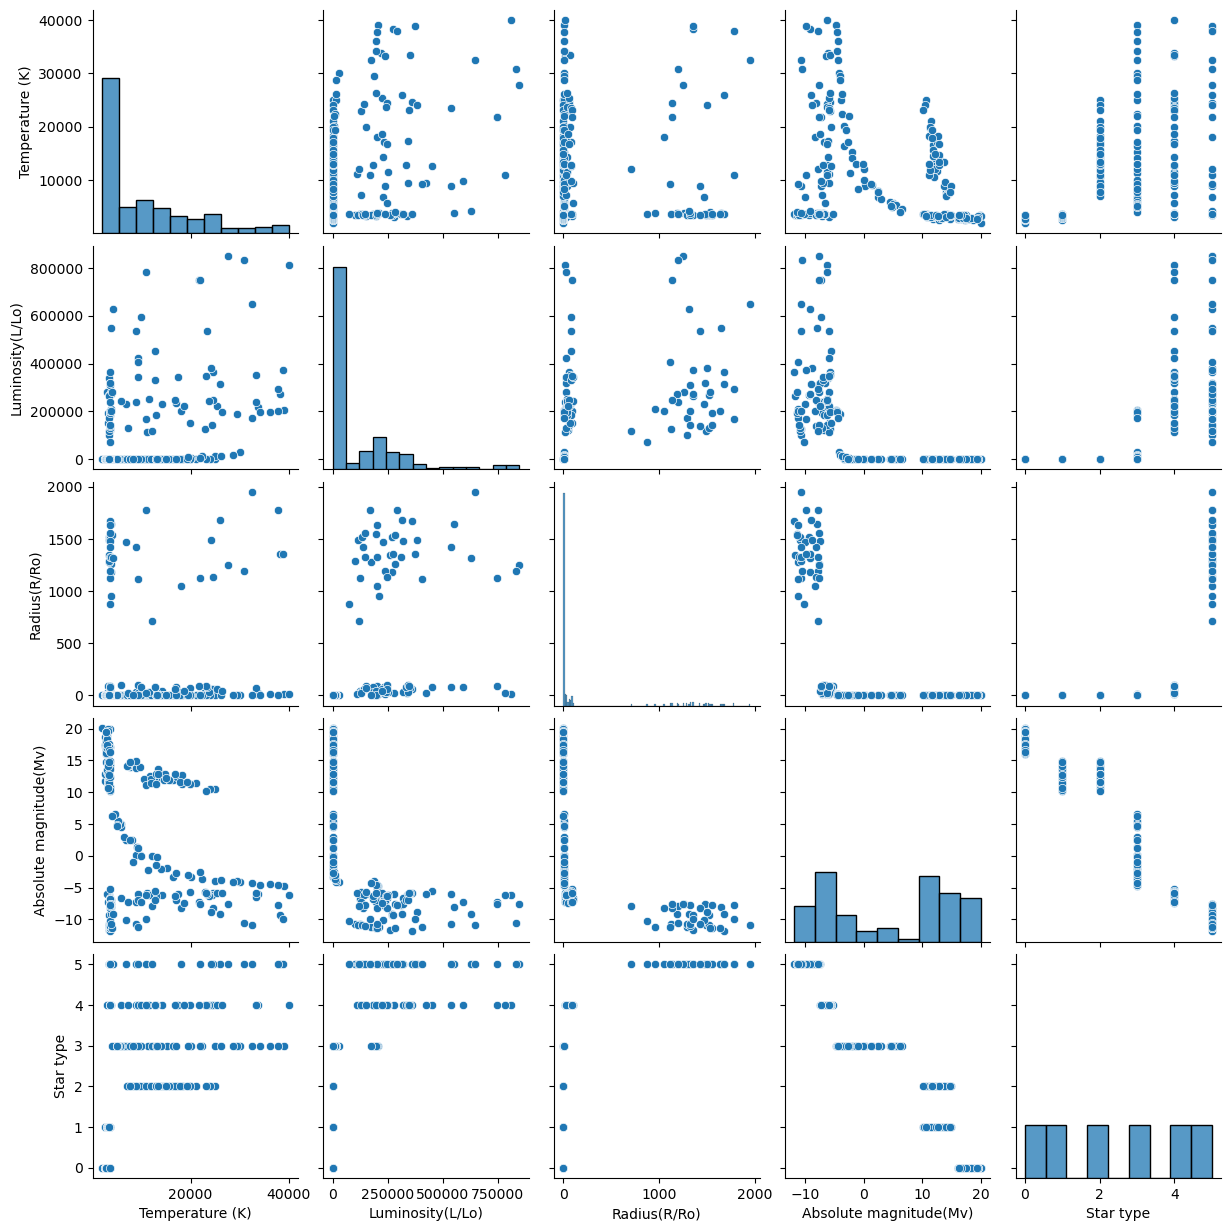

In [5]:
sns.pairplot(df)
plt.show()
#Calls the seaborn library to see the relationship between all the variables
# A visualisation technique used

In [6]:
df.head()
# Gives the first 5 rows values in a neat tabulated visual of all the features in the data file Stars

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M

In [7]:
df.describe()
# As seen in count all the features have 240, suggesting that there are no-null values
# This code displys the mean, max etc, just a general information about the dataset

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count       240.000000        240.000000    240.000000   
mean      10497.462500     107188.361635    237.157781   
std        9552.425037     179432.244940    517.155763   
min        1939.000000          0.000080      0.008400   
25%        3344.250000          0.000865      0.102750   
50%        5776.000000          0.070500      0.762500   
75%       15055.500000     198050.000000     42.750000   
max       40000.000000     849420.000000   1948.500000   

       Absolute magnitude(Mv)   Star type  
count              240.000000  240.000000  
mean                 4.382396    2.500000  
std                 10.532512    1.711394  
min                -11.920000    0.000000  
25%                 -6.232500    1.000000  
50%                  8.313000    2.500000  
75%                 13.697500    4.000000  
max                 20.060000    5.000000

In [8]:
df.dtypes
# Gives the types of variables in the dataset

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

In [9]:
df.shape
# Gices the amount of rows and columns in the dataset 

(240, 7)

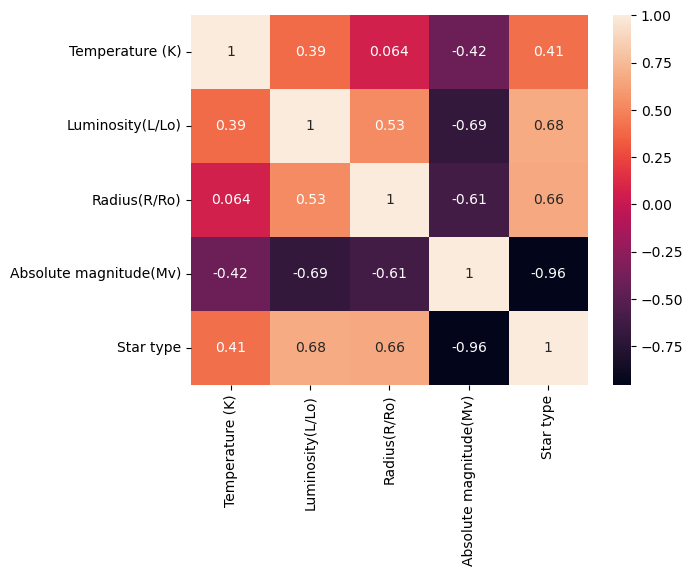

In [10]:
corr_matrix = np.corrcoef([df['Temperature (K)'] , df['Luminosity(L/Lo)'] , df['Radius(R/Ro)'], df['Absolute magnitude(Mv)'], 
                         df['Star type']])

#The corr_matrix variable stores the correlation coefficients between the selected columns. 

sns.heatmap(corr_matrix, annot=True,
           xticklabels=['Temperature (K)' , 'Luminosity(L/Lo)' , 'Radius(R/Ro)' , 'Absolute magnitude(Mv)', 
                         'Star type'],
           #xticklabels are used to plot the x axis 
            
           yticklabels=['Temperature (K)' , 'Luminosity(L/Lo)' , 'Radius(R/Ro)' , 'Absolute magnitude(Mv)', 
                         'Star type'])
          #yticklabels are used to plot the y axis
    
plt.show()

#The above is used to create a heatmap of the dataset, in order to see the correlation amongst the features

In [11]:
#One hot encoding

#The pd.get_dummies function is used to convert categorical variables into binary columns (one-hot encoded columns).

starcolor_dummies = pd.get_dummies(df['Star color'])
#Performs onehot encoding on the variable starcolor_dummies that contains the variable Star Color

spectral_dummies = pd.get_dummies(df['Spectral Class'])
#Performs onehot encoding on the varable spectral_dummies that contains the variable Spectral Class

OneHotEncodedf = pd.concat([df.drop(['Star color', 'Spectral Class'],axis=1), starcolor_dummies, spectral_dummies], axis=1)
# Concatenate the one-hot encoded columns with the original DataFrame

OneHotEncodedf

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type  Blue  Blue   Blue White  Blue white  Blue white   ...  white  \
0            0     0      0           0           0            0  ...      0   
1            0     0      0           0           0            0  ...      0   
2            0     0      0           0           0            0  ...      0   
3            0     0      0           0           0            0  ...      0   
4            0     0      0           0           0            0  ...      0   
..         ...   ...    ...         ...         ...          ...  ...    ...   
235          5     1      0           0           0            0  ...      0   
236          5     1      0           0           0            0  ...      0   
237          5     0      0           0           0            0  ...      0   
238          5     0      0           0           0            0  ...      0   
239          5     1      0           0           0            0  ...      0   

     yellow-white  yellowish  A  B  F  G  K  M  O  
0               0          0  0  0  0  0  0  1  0  
1               0          0  0  0  0  0  0  1  0  
2               0          0  0  0  0  0  0  1  0  
3               0          0  0  0  0  0  0  1  0  
4               0          0  0  0  0  0  0  1  0  
..            ...        ... .. .. .. .. .. .. ..  
235             0          0  0  0  0  0  0  0  1  
236             0          0  0  0  0  0  0  0  1  
237             0          0  1  0  0  0  0  0  0  
238             0          0  1  0  0  0  0  0  0  
239             0          0  0  0  0  0  0  0  1  

[240 rows x 31 columns]

In [12]:
# Feature Selection

In [13]:
X = df[['Temperature (K)' , 'Luminosity(L/Lo)' , 'Radius(R/Ro)' , 'Absolute magnitude(Mv)']]
# The varibale X contains Temperature (K) , Luminosity(L/Lo) , Radius(R/Ro) , Absolute magnitude(Mv)
# X is the input variabel 

Y = df['Star type']
# The variable Y contains Star Type
# Y is the output variabel

#So the plan is to basically predict the type of star (y) with the X variables


In [14]:
#Data cleaning, because Im paranoid for some reason but on a serious note the below code will only contain the rows that 
#do not have any missing values. This can be useful when dealing with datasets that have missing data 

X = X.dropna()
Y = Y.dropna()


In [15]:
X.isnull().sum()
Y.isnull().sum()

# The above will sum up the number of null values in X and Y  


0

In [16]:
#Random Forest Classification

In [17]:
# The below is when the variables are split in train and test percentages

testperc = [0.20 , 0.25 , 0.30 , 0.35 , 0.40] # array testperc is used 
traintestratios = []
accscore = []

for tp in testperc:
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,train_size = tp)
    rfc = RandomForestClassifier() #Random Forest Classifier
    rfc.fit(Xtrain,Ytrain) # Fits the data in the random forest classification model with the Xtrain and Ytrain variables
    rfcpred = rfc.predict(Xtest) # predicts with the Xtest value in the random forest classification model
    rfaccscore = accuracy_score(Ytest,rfcpred)# uses the Y test data points and the random forest prediction that it made on X test
    print('Train test split of ',tp*100, '% has an accuracy score of : ', rfaccscore) # gives the accuracy score of the various train and test split ratio
    traintestratios.append(tp*100)
    accscore.append(rfaccscore)
    

Train test split of  20.0 % has an accuracy score of :  0.9895833333333334
Train test split of  25.0 % has an accuracy score of :  0.9611111111111111
Train test split of  30.0 % has an accuracy score of :  0.9821428571428571
Train test split of  35.0 % has an accuracy score of :  0.9871794871794872
Train test split of  40.0 % has an accuracy score of :  1.0


In [18]:
plt.plot(traintestratios,accscore,marker='o')
plt.xlabel("Train Test split Ratio %")
plt.ylabel("Accuracy Score")
plt.title('Random Forest: Accuracy Scores vs Train Test Split Ratio')
plt.grid(True)
plt.show()


In [19]:
print(classification_report(Ytest,rfcpred))
# This prints out a table of how well the model has done in predicting the category 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        27

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [20]:
# Randome Forest classification - Model evaluation

In [21]:
rfccm = confusion_matrix(Ytest,rfcpred)
rfccm
# Provides information on how well the model has done by summarizing the predicted and actual class labels.
# This confusion matrix provides a breakdown of how the random forest classifier predictions match the true labels across all
# output variables.
# The code calculates the confusion matrix between Ytest (true label) and rfcpred (predicted label).
# Each row is responding to the actual class and each column is responding to the predicted class.
# e.g.: As seen in (1,1) there are 27 instances where the star type 0 or Red Dwarf was predicted by the random forest classifier

array([[20,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  0,  0],
       [ 0,  0, 24,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0],
       [ 0,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0, 27]], dtype=int64)

In [22]:
sns.heatmap(rfccm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest :Confusion Matrix")

# Show the plot
plt.show()

In [23]:
#Cross validation for Random Forest Classification
rfc_cv_scores = cross_val_score(rfc, X, Y, cv=5) 
# calculates the cross validation score using the random forest classifier with the X and Y variables and cross validates it 5 times

#print("Cross-validation scores:", rfc_cv_scores) # prints the cross validation score
plt.plot(np.arange(1, 6), rfc_cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()

In [24]:
# Save the trained model
dump(rfc, 'HaseebRFC.joblib')

# Load the saved model
loaded_model = load('HaseebRFC.joblib')

In [25]:
#Naive Bayes Classification

In [55]:
# The below is when the variables are split in train and test percentages

for tp in testperc:# this is a loop that will be repearted 5 times with different train test split size %
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,train_size = tp)
    nbc = GaussianNB()# nbc contains the GuassianNB method which is used in naive bayers classification  
    nbc.fit(Xtrain,Ytrain)  # fits the training data in the variabel that contains the GaussianNB method in order to classify and predict 
    nbcpred = nbc.predict(Xtest) # makes predictions using X test split ratio which is 20,25,30,35, and 40 %
    # nbcpred used to visualise the predictions 
    nbcaccscore = accuracy_score(Ytest,nbcpred)# calculates the accuracy score using the Ytest and the prediction of naive bayers
    print('Train test split of ',tp*100, '% has an accuracy score of : ', nbcaccscore*100 ,'%') # prints the accuracy score with the different split ratios
    traintestratios.append(tp*100)
    accscore.append(nbcaccscore)

Train test split of  20.0 % has an accuracy score of :  81.77083333333334 %
Train test split of  25.0 % has an accuracy score of :  83.88888888888889 %
Train test split of  30.0 % has an accuracy score of :  84.52380952380952 %
Train test split of  35.0 % has an accuracy score of :  85.25641025641025 %
Train test split of  40.0 % has an accuracy score of :  77.77777777777779 %


In [56]:
plt.plot(traintestratios,accscore,marker='o')
plt.xlabel("Train Test split Ratio %")
plt.ylabel("Accuracy Score")
plt.title(' Naive Bayers : Accuracy Scores vs Train Test Split Ratio')
plt.grid(True)
plt.show()

In [57]:
print(classification_report(Ytest,nbcpred))
# This prints out a table of how well the model has done in predicting the category 

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        24
           1       0.59      0.79      0.68        24
           2       0.71      1.00      0.83        20
           3       1.00      0.32      0.48        22
           4       0.81      1.00      0.90        26
           5       1.00      1.00      1.00        28

    accuracy                           0.78       144
   macro avg       0.80      0.77      0.75       144
weighted avg       0.81      0.78      0.76       144



In [58]:
nbccm = confusion_matrix(Ytest,nbcpred)
nbccm
# Provides information on how well the naive bayers model has done by summarizing the predicted and actual class labels.
# This confusion matrix provides a breakdown of how the model predictions match the true labels across all output variables.
# The code calculates the confusion matrix between Ytest (true label) and nbcpred (predicted label).
# Each row is responding to the actual class and each column is responding to the predicted class.


array([[12, 12,  0,  0,  0,  0],
       [ 5, 19,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0],
       [ 0,  1,  8,  7,  6,  0],
       [ 0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0, 28]], dtype=int64)

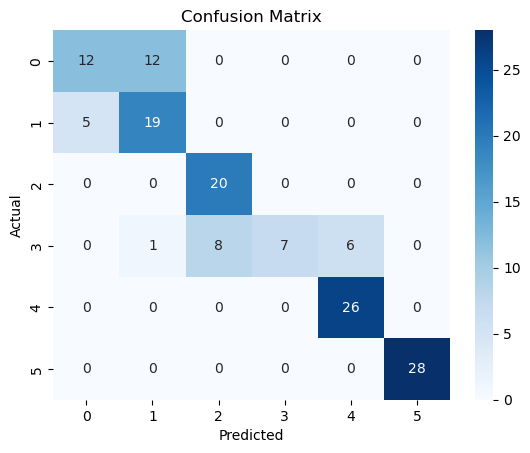

In [59]:
sns.heatmap(nbccm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

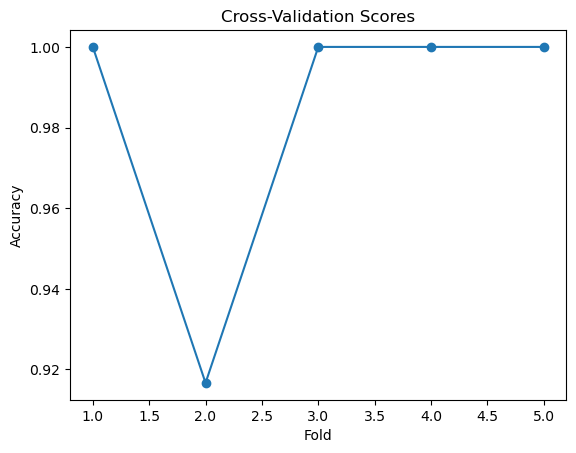

In [31]:
#Cross validation for Naive Bayers
nbc_cv_score = cross_val_score(nbc,X,Y,cv=5)
# calculates the cross validation score using the naive bayers classifier with the X and Y variables and cross validates it 5 times
#print("Cross-validation scores:",nbc_cv_score)
# prints the score
plt.plot(np.arange(1, 6), rfc_cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()

In [32]:
# Save the trained model
dump(nbc, 'HaseebNBC.joblib')

# Load the saved model
loaded_model = load('HaseebNBC.joblib')

In [33]:
#Knn classification

In [60]:
karr = [3,5,7]

for tp in testperc:# this is a loop that will be repearted 5 times with different train test split size %
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,train_size = tp)
    for k in karr: # Will Loop 3 times as the variabel karr is the array that contains the K amount of neighbors 
        knn = KNeighborsClassifier(n_neighbors=k) # knn variable contains the method KNeighborsClassifier (which will use the KNN technique to make predictions)
        knn.fit(Xtrain,Ytrain) # Fits the training data       
        knnpred = knn.predict(Xtest) # Makes predictions based on the test percentage
        knnaccscore = accuracy_score(Ytest,knnpred) # calculates accuracy score
        print("K =", k, ": ", knnaccscore*100 , '%') # prints accuracy score
        print('Train test split of ',tp*100, '% has an accuracy score of : ', knnaccscore*100, '%')# Will display the train test split
        #percentage including the number of K nearest neighbor 
        traintestratios.append(tp*100)
        accscore.append(knnaccscore)
        



K = 3 :  60.416666666666664 %
Train test split of  20.0 % has an accuracy score of :  60.416666666666664 %
K = 5 :  54.6875 %
Train test split of  20.0 % has an accuracy score of :  54.6875 %
K = 7 :  51.041666666666664 %
Train test split of  20.0 % has an accuracy score of :  51.041666666666664 %
K = 3 :  62.77777777777778 %
Train test split of  25.0 % has an accuracy score of :  62.77777777777778 %
K = 5 :  58.333333333333336 %
Train test split of  25.0 % has an accuracy score of :  58.333333333333336 %
K = 7 :  53.888888888888886 %
Train test split of  25.0 % has an accuracy score of :  53.888888888888886 %
K = 3 :  61.904761904761905 %
Train test split of  30.0 % has an accuracy score of :  61.904761904761905 %
K = 5 :  52.38095238095239 %
Train test split of  30.0 % has an accuracy score of :  52.38095238095239 %
K = 7 :  53.57142857142857 %
Train test split of  30.0 % has an accuracy score of :  53.57142857142857 %
K = 3 :  55.769230769230774 %
Train test split of  35.0 % has an 

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

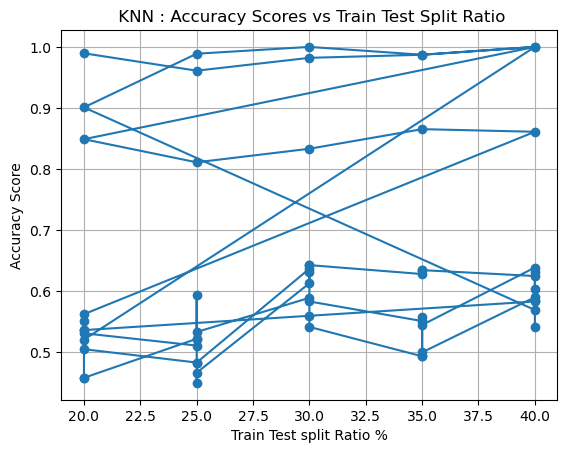

In [51]:
plt.plot(traintestratios,accscore,marker='o')
plt.xlabel("Train Test split Ratio %")
plt.ylabel("Accuracy Score")
plt.title(' KNN : Accuracy Scores vs Train Test Split Ratio')
plt.grid(True)
plt.show()

In [36]:
print(classification_report(Ytest,knnpred))
# this is code that displays how well the the Knn model did in making predictions

              precision    recall  f1-score   support

           0       0.87      0.62      0.72        21
           1       0.54      0.90      0.68        21
           2       0.76      0.62      0.68        26
           3       0.42      0.46      0.44        24
           4       0.48      0.37      0.42        27
           5       0.50      0.52      0.51        25

    accuracy                           0.57       144
   macro avg       0.60      0.58      0.57       144
weighted avg       0.59      0.57      0.57       144



In [37]:
knncm = (confusion_matrix(Ytest, knnpred))
knncm
#displays the number of instances a value was predicted using knn model to the true class label
# each column is the predicted class and each row is the actual class

array([[13,  8,  0,  0,  0,  0],
       [ 2, 19,  0,  0,  0,  0],
       [ 0,  0, 16, 10,  0,  0],
       [ 0,  8,  5, 11,  0,  0],
       [ 0,  0,  0,  4, 10, 13],
       [ 0,  0,  0,  1, 11, 13]], dtype=int64)

In [38]:
#Cross Validation for KNN
knn_cv_score = cross_val_score(knn,X,Y,cv=5) # calculates the cross validation score using the K Neighbors method, X, Y and will be cross validated 5 times
print("Cross Validation:", knn_cv_score)# prints the cross validation score

Cross Validation: [0.58333333 0.54166667 0.64583333 0.625      0.5625    ]


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [39]:
# Save the trained model
dump(knn, 'HaseebKNN.joblib')

# Load the saved model
loaded_model = load('HaseebKNN.joblib')

In [40]:
# The below is when the variables are split in train and test percentages

for tp in testperc:# this is a loop that will be repearted 5 times with different train test split size %
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,train_size = tp)
    dtc = DecisionTreeClassifier() # uses the Decision tree classifier method
    dtc.fit(Xtrain,Ytrain)# fits the data 
    dtcpred = dtc.predict(Xtest)# predicts the value using the decision tree mthod
    dtcaccscore = accuracy_score(Ytest,dtcpred) # calculates the accuracy score
    print('Train test split of ',tp*100, '% has an accuracy score of : ', dtcaccscore) # prints the accuracy score with the different split ratios
    traintestratios.append(tp*100)
    accscore.append(dtcaccscore)

Train test split of  20.0 % has an accuracy score of :  0.9010416666666666
Train test split of  25.0 % has an accuracy score of :  0.9888888888888889
Train test split of  30.0 % has an accuracy score of :  1.0
Train test split of  35.0 % has an accuracy score of :  0.9871794871794872
Train test split of  40.0 % has an accuracy score of :  1.0


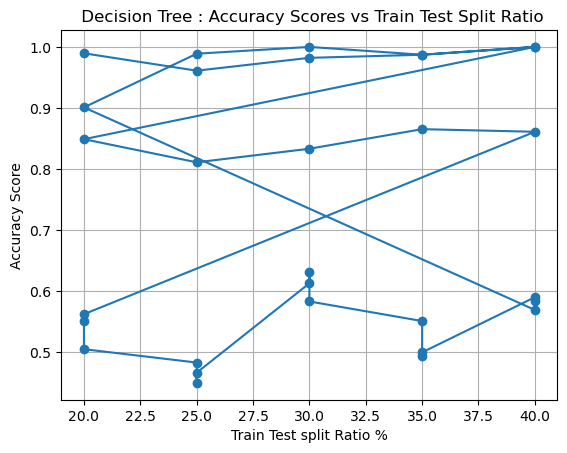

In [41]:
plt.plot(traintestratios,accscore,marker='o')
plt.xlabel("Train Test split Ratio %")
plt.ylabel("Accuracy Score")
plt.title(' Decision Tree : Accuracy Scores vs Train Test Split Ratio')
plt.grid(True)
plt.show()

In [42]:
print(classification_report(Ytest,dtcpred))
# this is code that displays how well the the decision tree model did in making predictions

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        24

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [43]:
dtccm = confusion_matrix(Ytest,dtcpred)
dtccm
# Displays the breakdown of the amount of instances that a particular output is seen in the prediction 
# Columns are responding to the times a star type was predicted and rows are responding to the times a star type was actually there 

array([[22,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0],
       [ 0,  0,  0,  0, 25,  0],
       [ 0,  0,  0,  0,  0, 24]], dtype=int64)

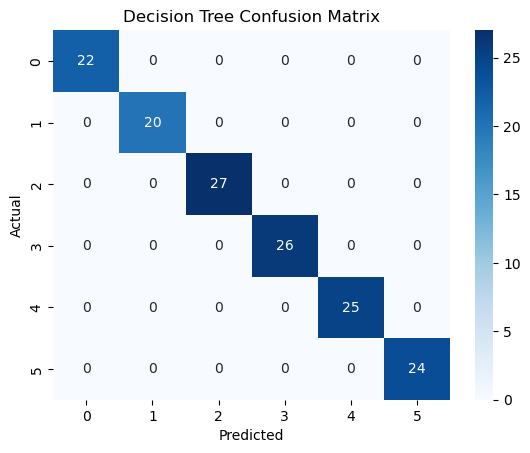

In [44]:
sns.heatmap(dtccm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")

# Show the plot
plt.show()

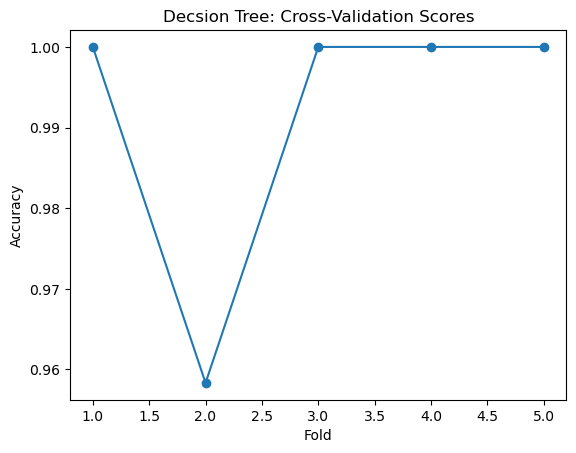

In [45]:
#Cross Validation for Descision Tree Classifier
dtc_cv_score = cross_val_score(dtc,X,Y,cv=5) # Calculates the cross validation score by using the model, X, Y , the amount of times it will cross validate
#print("Cross Validation:", dtc_cv_score) # prints the cross validation score
plt.plot(np.arange(1, 6), dtc_cv_score, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Decsion Tree: Cross-Validation Scores')
plt.show()

In [46]:
# Save the trained model
dump(dtc, 'HaseebDTC.joblib')

# Load the saved model
loaded_model = load('HaseebDTC.joblib')

In [47]:
#Personal comments about haseeb - the author of this task
# Welcome to Haseeb's World

In [48]:
# Where the code has to also eat healthy and attend the Gym 3 times a day and 8 days a week

In [ ]:
# Where the code has the to respond to haseeb in the most psyclogical way and also give a fictional scenario if the code matter
# gets bad